In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('wine.csv')

In [5]:
# Basic data exploration
print("Dataset shape:", df.shape)
print("Columns:", df.columns)
print("Data types:\n", df.dtypes)
print("First few rows:\n", df.head())

Dataset shape: (178, 14)
Columns: Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')
Data types:
 Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object
First few rows:
    Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50 

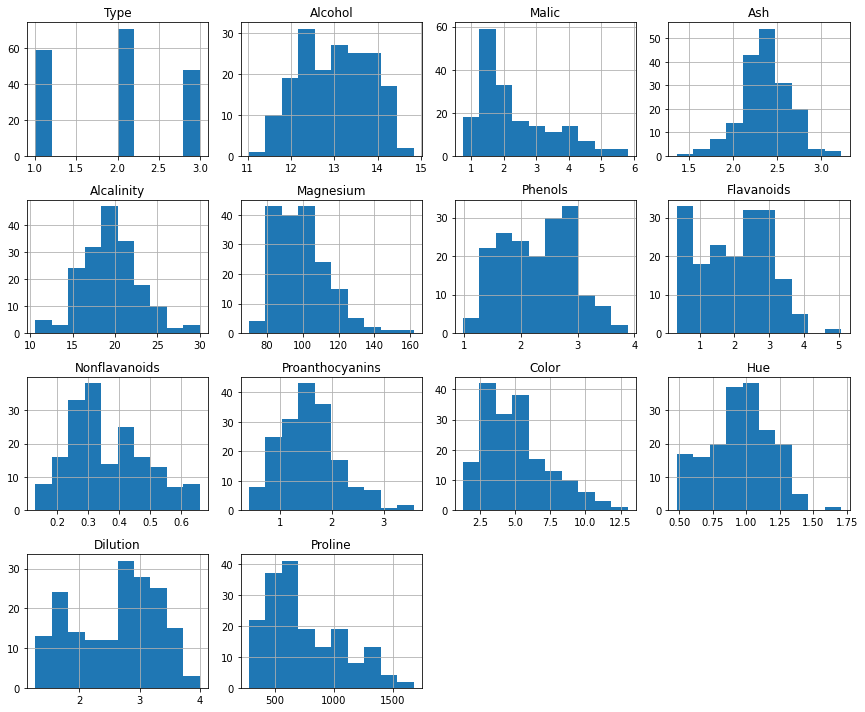

In [6]:
# Examine the distribution of features using histograms
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

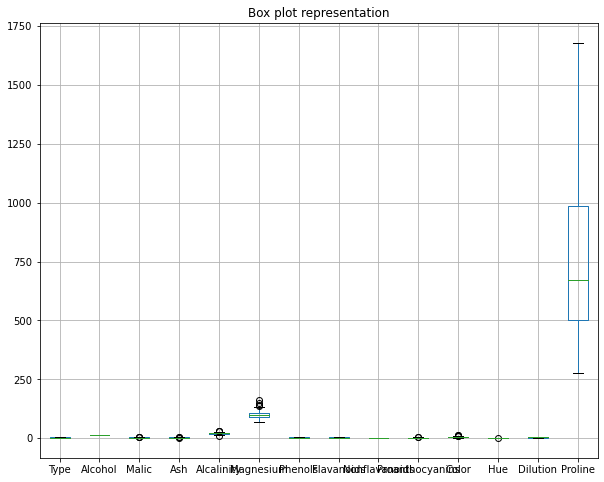

In [7]:
df.boxplot(figsize=(10, 8))
plt.title('Box plot representation')
plt.show()

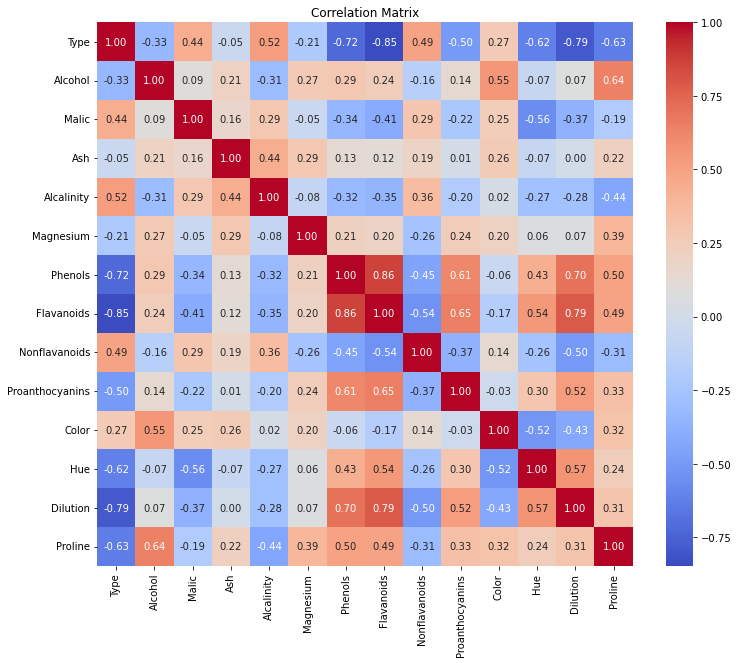

In [8]:
# Investigate correlations between features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Standardization

In [9]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

SS_X  = SS.fit_transform(df.iloc[:,2:])
SS_X

array([[-0.5622498 ,  0.23205254, -1.16959318, ...,  0.36217728,
         1.84791957,  1.01300893],
       [-0.49941338, -0.82799632, -2.49084714, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.02123125,  1.10933436, -0.2687382 , ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.74474449, -0.38935541,  0.15166079, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.22769377,  0.01273209,  0.15166079, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.58316512,  1.36520822,  1.50294326, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [10]:
# Implement PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca_features = pca.fit_transform(SS_X)

# Print the results
print("Original features shape:", df.shape)
print("Transformed features shape:", pca_features.shape)

Original features shape: (178, 14)
Transformed features shape: (178, 4)


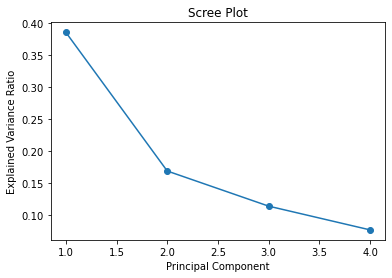

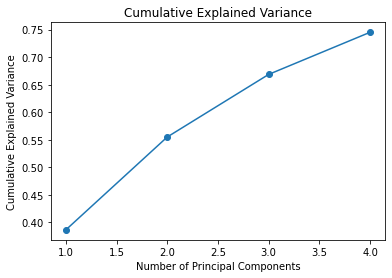

In [14]:
# Calculate the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
import numpy as np
# Create a scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

In [17]:
#Transforming orginal data to PCA data
transformed_data = pca.transform(SS_X)
print(transformed_data)

[[-3.07857252e+00 -1.21926180e+00 -3.88069767e-01 -2.39523061e-01]
 [-2.19079587e+00  6.64568240e-01 -1.92210947e+00 -2.91410650e-01]
 [-2.45644079e+00 -1.50581110e+00  5.56489034e-01  7.23595832e-01]
 [-3.42275012e+00 -2.55605831e+00 -7.03345739e-01  5.64575214e-01]
 [-9.48975875e-01 -1.32973488e+00  1.76063170e+00 -4.11976922e-01]
 [-2.76731538e+00 -1.77985016e+00 -9.44531169e-01 -5.06330177e-01]
 [-2.18375478e+00 -4.58036710e-01 -8.05131410e-01 -2.80189959e-02]
 [-1.82632140e+00 -1.33985744e+00 -2.81585363e-03 -1.18965608e+00]
 [-2.19383381e+00  2.03202783e-01 -1.37391008e+00  9.22449832e-02]
 [-2.59000186e+00 -4.35609334e-01 -1.00682982e+00  3.59339550e-01]
 [-3.26089058e+00 -1.03803643e+00 -5.51904036e-01  3.52510697e-02]
 [-1.55488981e+00  1.04878503e-01 -9.22660838e-01 -8.60139822e-01]
 [-1.96567565e+00 -2.73148206e-01 -7.68037835e-01 -3.18624868e-01]
 [-3.14743458e+00 -2.58202082e-01 -9.02256787e-01  2.29520183e-01]
 [-4.00629989e+00 -1.65773346e+00 -1.56480932e+00  3.21571938e

In [24]:
#Apply a clustering algorithm (e.g., K-means) to the original dataset
from sklearn.cluster import KMeans

# Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

# Get the cluster labels
labels = kmeans.labels_

# Print the cluster labels
print(labels)

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Print the DataFrame with cluster labels
print(df)

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]
     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174   

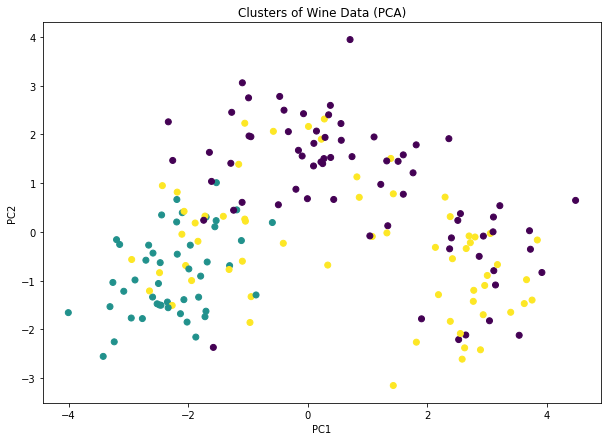

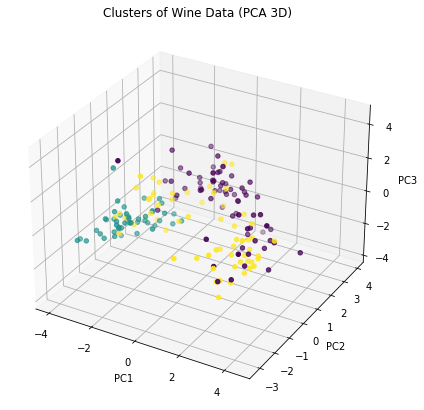

In [25]:
# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters of Wine Data (PCA)')
plt.show()

# Visualize the clusters using a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2], c=labels)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.title.set_text('Clusters of Wine Data (PCA 3D)')
plt.show()

In [21]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(df, labels)
print("Silhouette score:", silhouette_avg)

# Calculate the Davies-Bouldin index
davies_bouldin = davies_bouldin_score(df, labels)
print("Davies-Bouldin index:", davies_bouldin)

Silhouette score: 0.571140440717417
Davies-Bouldin index: 0.5342554741398516


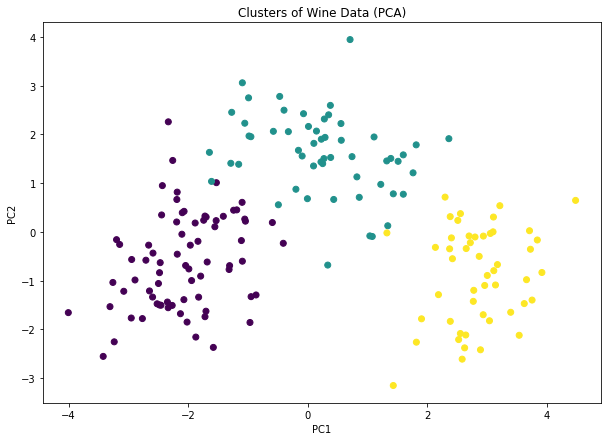

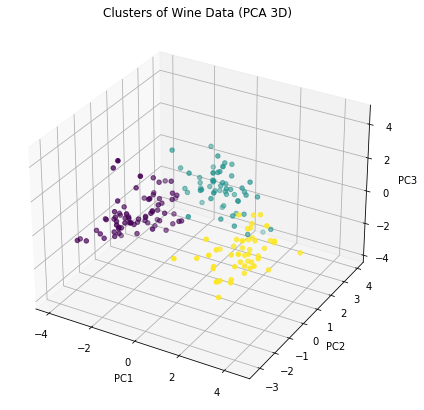

In [30]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels_pca)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters of Wine Data (PCA)')
plt.show()


# Visualize the clusters for the PCA-transformed dataset using a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2], c=labels_pca)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.title.set_text('Clusters of Wine Data (PCA 3D)')
plt.show()

In [31]:
# Calculate the silhouette score for the PCA-transformed dataset
silhouette_avg_pca = silhouette_score(pca_features, labels_pca)
print("Silhouette score (PCA):", silhouette_avg_pca)

# Calculate the Davies-Bouldin index for the PCA-transformed dataset
davies_bouldin_pca = davies_bouldin_score(pca_features, labels_pca)
print("Davies-Bouldin index (PCA):", davies_bouldin_pca)

Silhouette score (PCA): 0.3833021572655128
Davies-Bouldin index (PCA): 1.0589994282076534


# Comparing Original and PCA Data

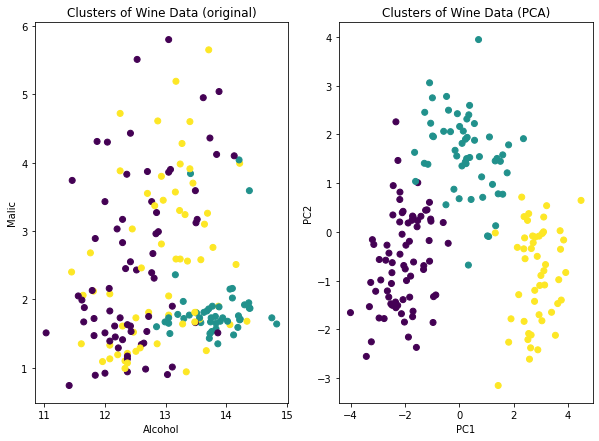

In [33]:

# Visualize the clusters from both datasets
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.scatter(df['Alcohol'], df['Malic'], c=labels)
plt.xlabel('Alcohol')
plt.ylabel('Malic')
plt.title('Clusters of Wine Data (original)')

plt.subplot(1, 2, 2)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels_pca)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters of Wine Data (PCA)')
plt.show()

#### Similarities:

 Both clustering results identify three distinct clusters.
 The overall distribution of the clusters is similar in both cases.

#### Differences:
 The clusters in the PCA-transformed data are more compact and well-separated than those in the original data.
 The clusters in the PCA-transformed data are more spherical in shape, while those in the original data are more elongated.
 The clusters in the PCA-transformed data are better aligned with the principal components.

#### Advantages of using PCA:

 Reduced computational complexity
 Improved cluster separation
 Reduced noise and outliers
 Improved interpretability

#### Disadvantages of using PCA:

 Loss of information
 Difficulty in choosing the number of principal components
 Potential for overfitting

#### Advantages of clustering directly on the original dataset:

 No loss of information
 No need to choose the number of principal components
 Less prone to overfitting

#### Disadvantages of clustering directly on the original dataset:
 Increased computational complexity
 Potential for poorer cluster separation
 Increased impact of noise and outliers
 Reduced interpretability

## Key Findings:

 PCA can be used to improve the performance of K-means clustering in terms of silhouette score and Davies-Bouldin index.
 The clusters obtained from the PCA-transformed data are more compact, well-separated, and spherical in shape than those 
obtained from the original data.
 PCA can also be used to reduce the computational complexity of K-means clustering.
